<a href="https://colab.research.google.com/github/abigailayimbisa/weight-biases-assignment/blob/main/Abigail(weight%26baises)Logistic_regression%26DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [2]:
# Log in to your W&B account
import wandb



In [4]:
wandb.login()

wandb: Currently logged in as: ayimbisaabigail (ayimbisaabigail-usiu). Use `wandb login --relogin` to force relogin


True

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [6]:
df = pd.read_csv('urlset.csv', encoding= 'ISO-8859-1', on_bad_lines='skip')
df.head()

<ipython-input-6-451235629b4c>:1: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('urlset.csv', encoding= 'ISO-8859-1', on_bad_lines='skip')


,ï»¿domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1,NaN


In [7]:
df.tail()

,ï»¿domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
96006,xbox360.ign.com/objects/850/850402.html,339,1,1,2.0,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0,NaN
96007,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3.0,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0,NaN
96008,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3.0,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0,NaN
96009,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4.0,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0,NaN
96010,www.angelfire.com/goth/devilmaycrytonite/,2547,1,1,5.0,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157,0,NaN


In [8]:
df.shape

(96011, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96011 entries, 0 to 96010
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿domain      96007 non-null  object 
 1   ranking        95955 non-null  object 
 2   mld_res        95937 non-null  object 
 3   mld.ps_res     95926 non-null  object 
 4   card_rem       95925 non-null  float64
 5   ratio_Rrem     95925 non-null  float64
 6   ratio_Arem     95925 non-null  float64
 7   jaccard_RR     95924 non-null  float64
 8   jaccard_RA     95923 non-null  float64
 9   jaccard_AR     95922 non-null  float64
 10  jaccard_AA     95921 non-null  float64
 11  jaccard_ARrd   95921 non-null  object 
 12  jaccard_ARrem  95919 non-null  object 
 13  label          95915 non-null  object 
 14  Unnamed: 14    2 non-null      float64
dtypes: float64(8), object(7)
memory usage: 11.0+ MB


In [ ]:
df.nunique()

ï»¿domain        96005
ranking           8206
mld_res             20
mld.ps_res           9
card_rem            53
ratio_Rrem       10042
ratio_Arem       10231
jaccard_RR        5448
jaccard_RA        5629
jaccard_AR        5071
jaccard_AA        5313
jaccard_ARrd      1071
jaccard_ARrem    30750
label                5
Unnamed: 14          1
dtype: int64

In [10]:
df.isnull().sum()

ï»¿domain            4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96009
dtype: int64

In [11]:
df.duplicated().sum()

4

In [12]:
df.describe(include='all')

,ï»¿domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
count,96007,95955,95937,95926,95925.000000,95925.000000,95925.000000,95924.000000,95923.000000,95922.000000,95921.000000,95921,95919,95915,2.0
unique,96005,8206,20,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1071,30750,5,NaN
top,'www.allegropl.xaa.pl/enter_login.html?session...,10000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,NaN
freq,2,46495,43559,55182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44112,5013,47904,NaN
mean,NaN,NaN,NaN,NaN,4.580402,135.252548,138.544869,0.008613,0.003808,0.003378,0.003661,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,4.466075,160.988266,175.478722,0.846011,0.025638,0.024010,0.028492,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,6.000000,174.142857,178.300000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.0


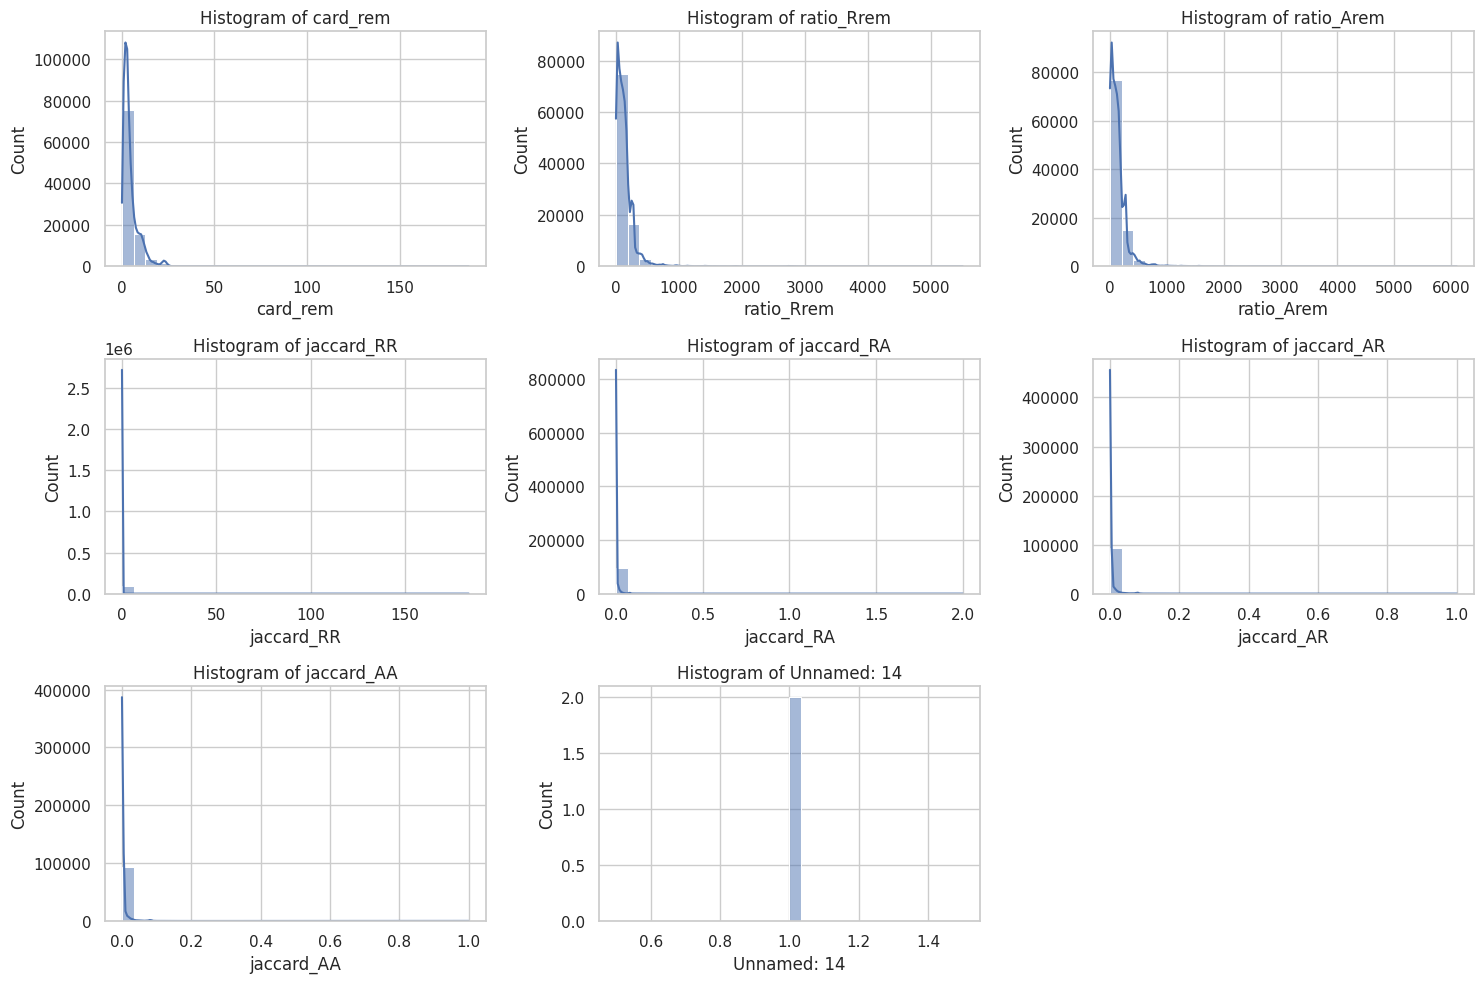

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# 1. Histograms for numerical features
numerical_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

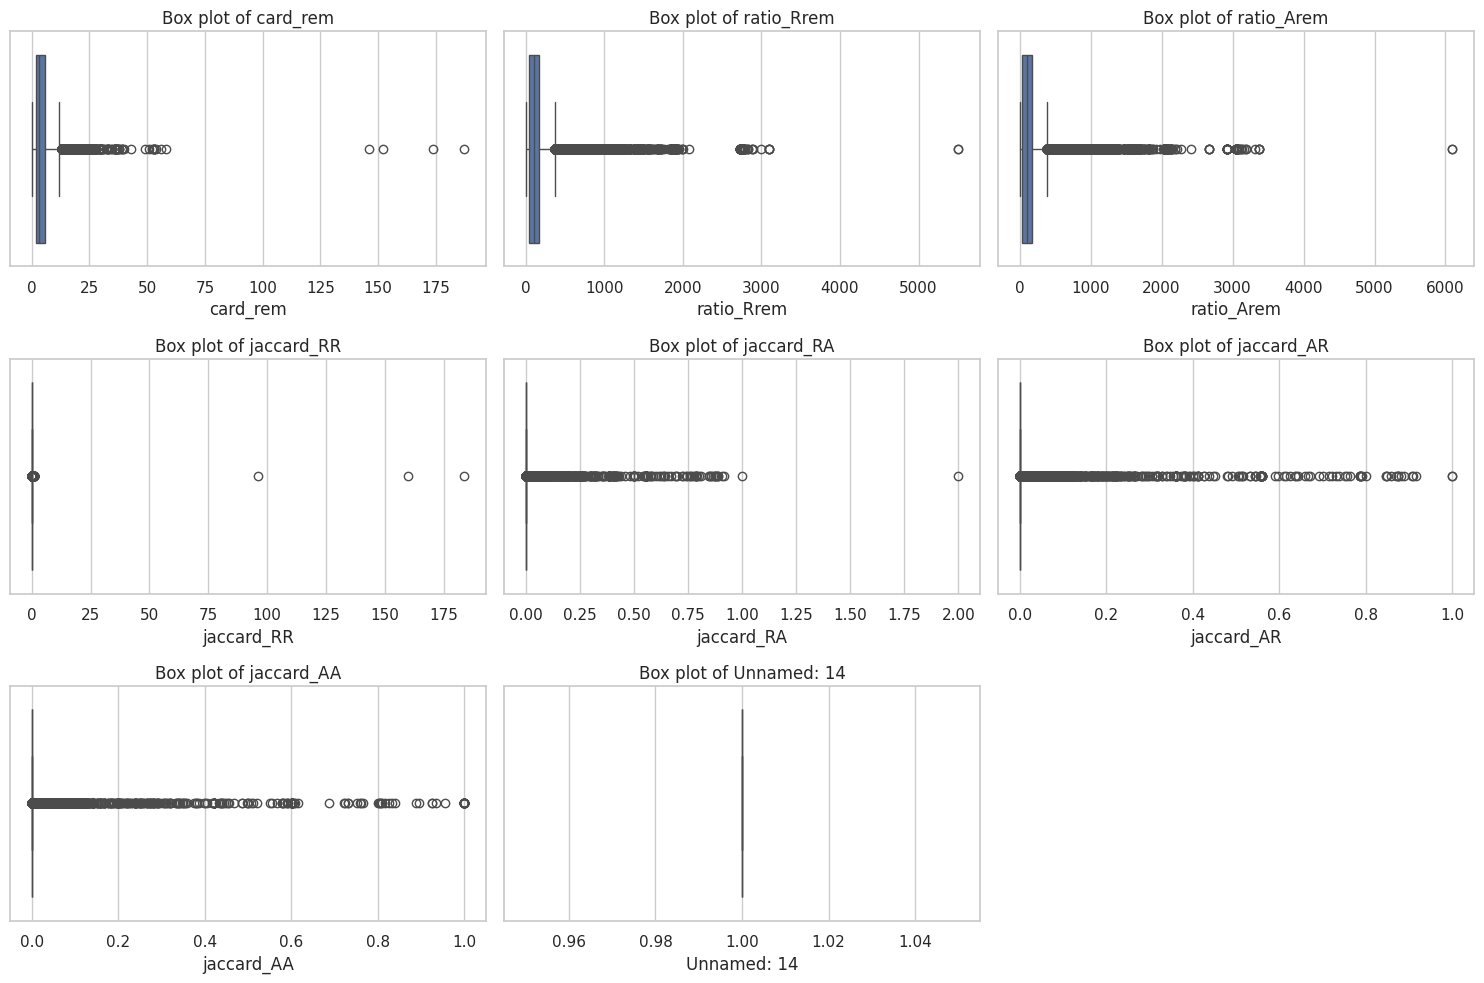

In [14]:
# 2. Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

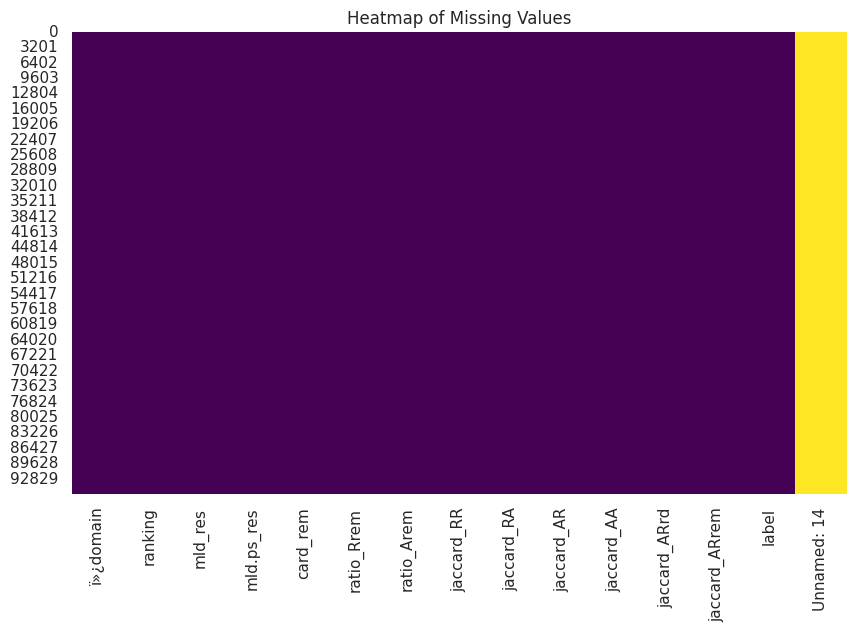

In [15]:
# 3. Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [16]:
df= df.drop('Unnamed: 14', axis=1)


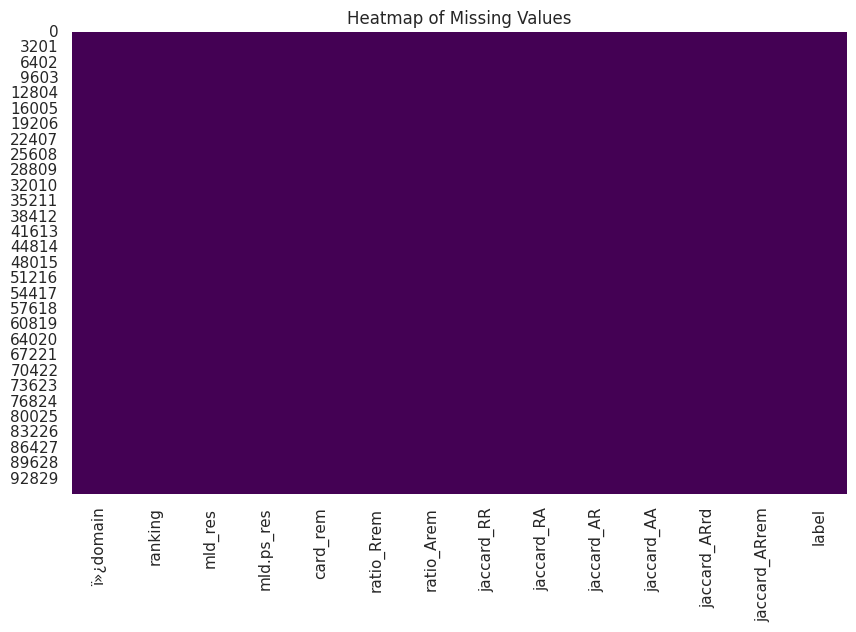

In [17]:
# 3. Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

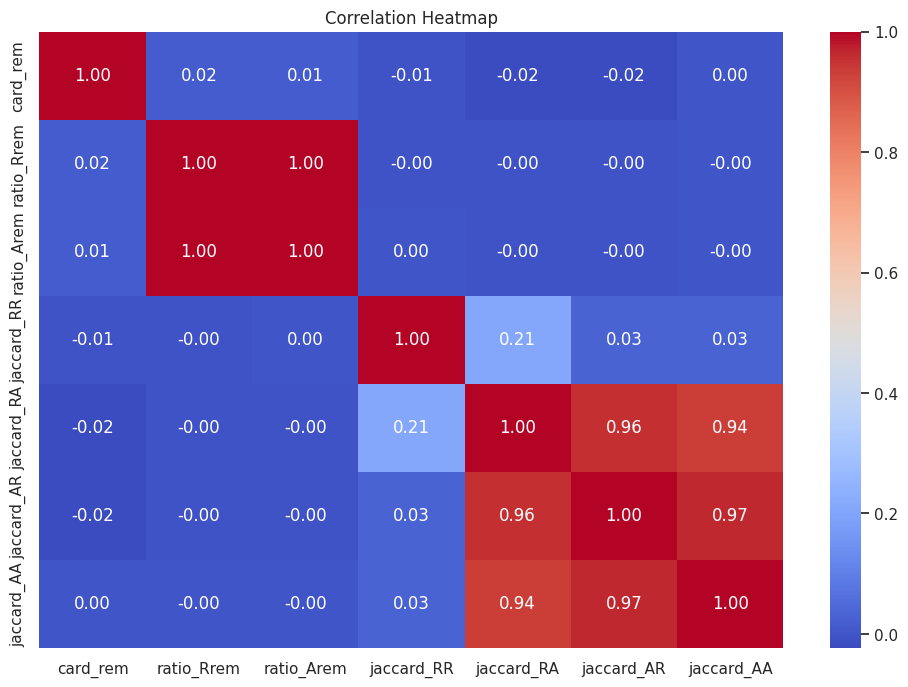

In [18]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

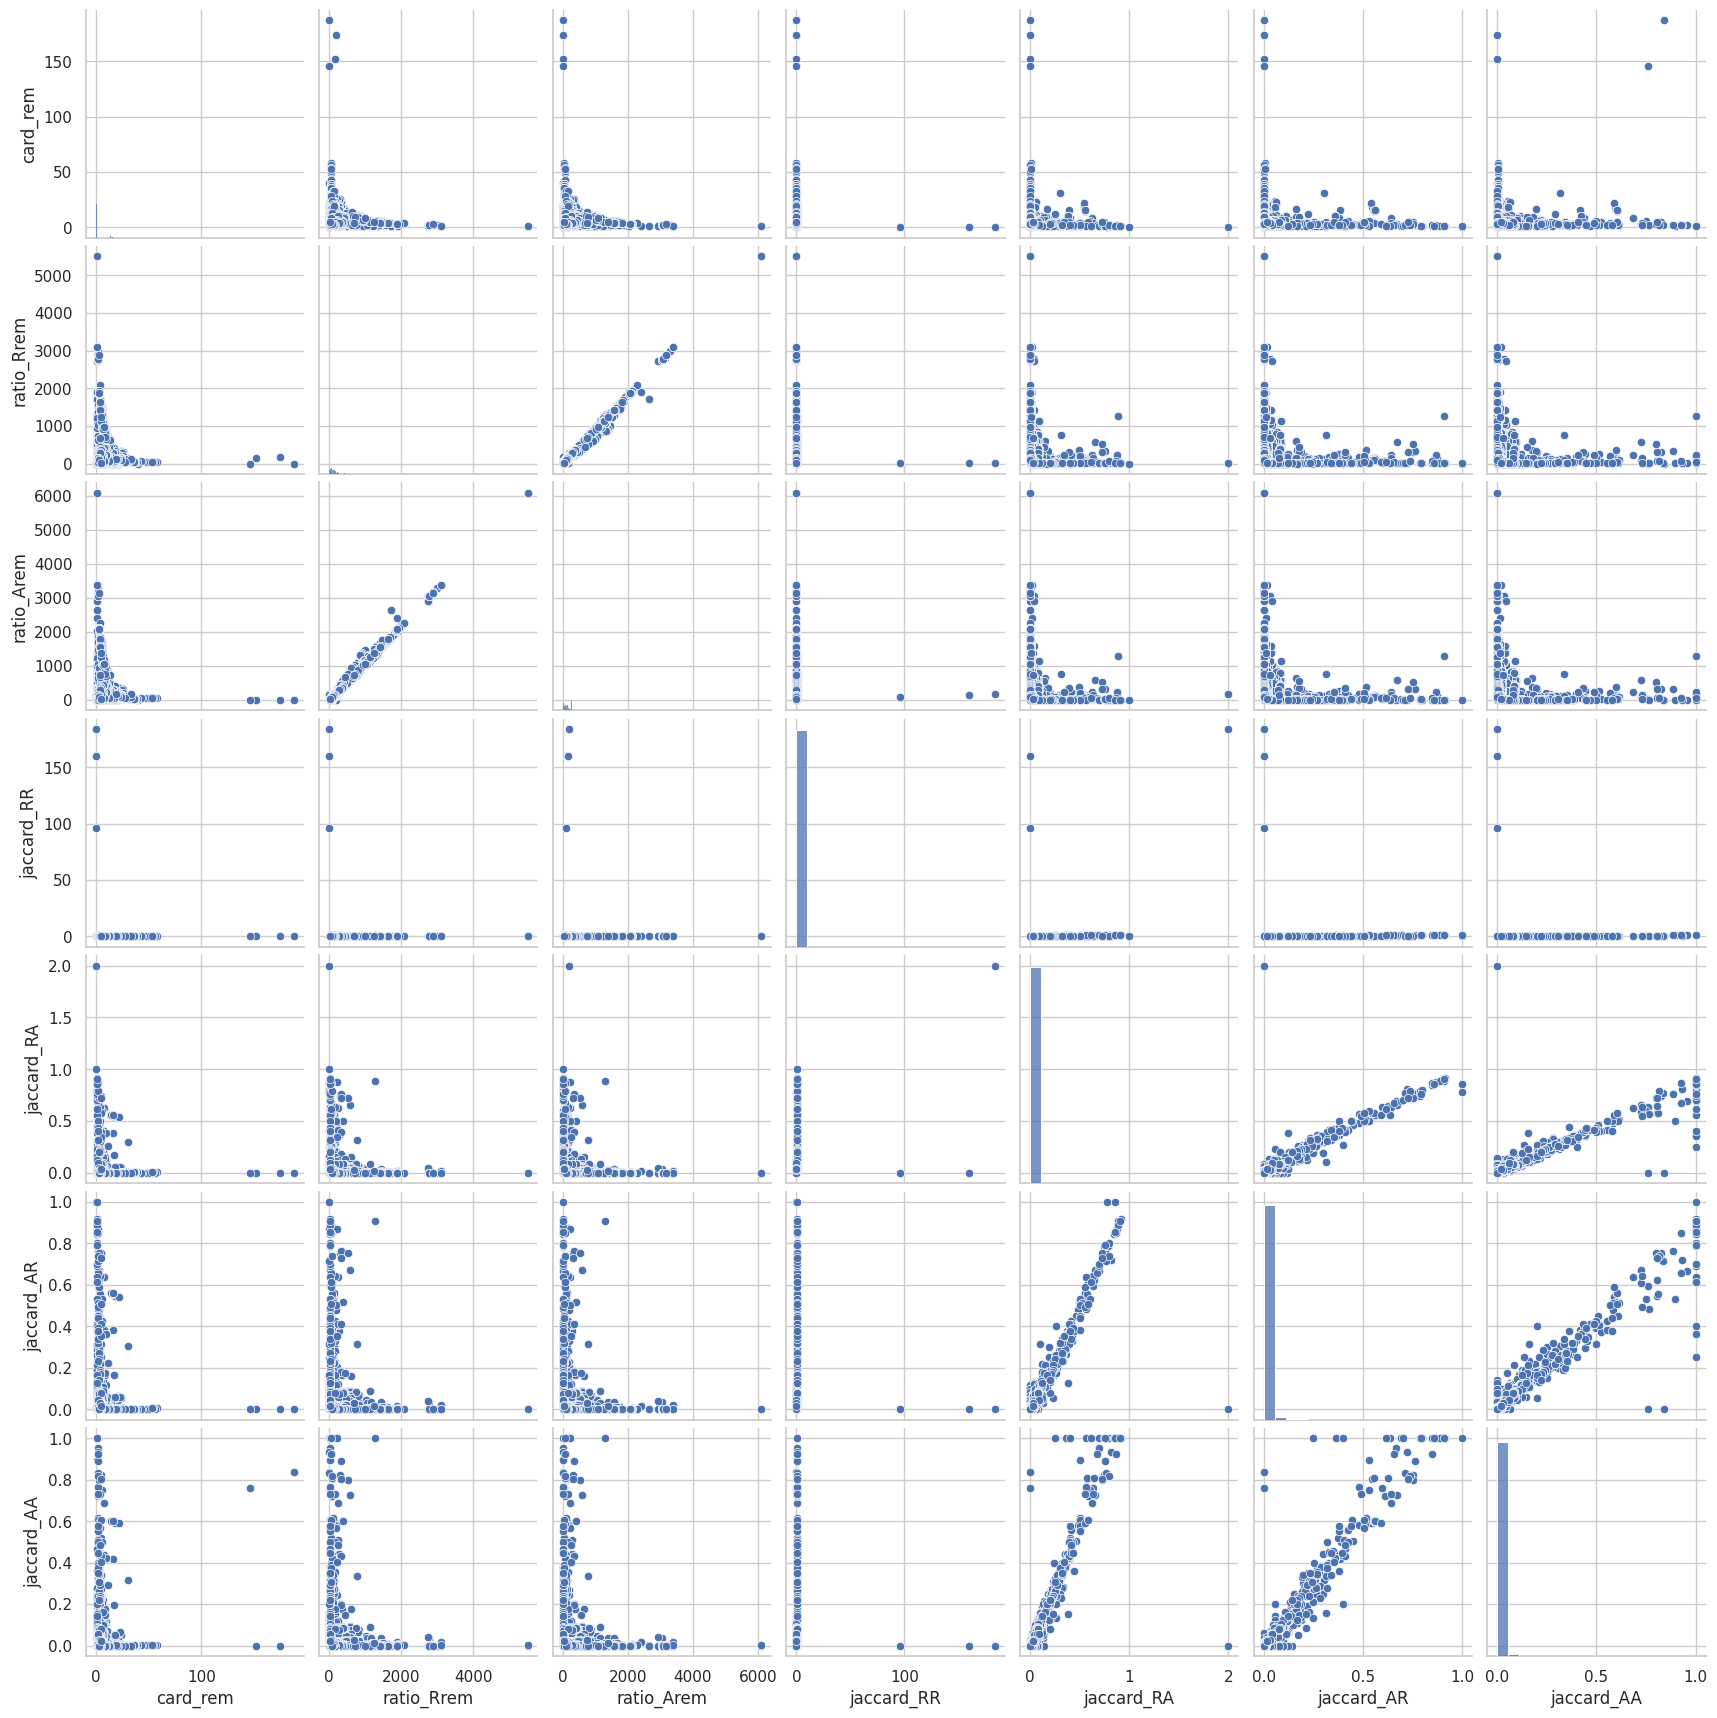

In [19]:
# 5. Pair plots
# Select only numerical columns for pair plots after dropping 'Unnamed: 14'
numerical_df = df.select_dtypes(include=['number'])
sns.pairplot(numerical_df)
plt.show()

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

Identify non-numerical columns

In [21]:
non_numerical_cols = df.select_dtypes(exclude=['number']).columns


In [22]:
for col in non_numerical_cols:
    le = LabelEncoder()
    # Convert the column to string type before applying LabelEncoder
    df[col] = le.fit_transform(df[col].astype(str))

In [23]:
# Split the data into features and target
X = df.drop('label', axis=1)
y = df['label']

In [24]:
# Impute missing values with the most frequent value (you can choose a different strategy)
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

In [30]:
# Loop to run the experiment 6 times
for run in range(4):
    # Initialize W&B run
    wandb.init(project='abigailphishing-urls', entity='ayimbisaabigail-usiu', name=f'run_{run+1}')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    print(f"Run {run+1} - Logistic Regression Accuracy: {lr_accuracy:.2f}")

    # Log Logistic Regression metrics to W&B
    wandb.log({'Run': run+1, 'Logistic Regression Accuracy': lr_accuracy})

    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    print(f"Run {run+1} - Decision Tree Accuracy: {dt_accuracy:.2f}")

    # Log Decision Tree metrics to W&B
    wandb.log({'Run': run+1, 'Decision Tree Accuracy': dt_accuracy})

    # Compare the models
    more_accurate_model = 'Logistic Regression' if lr_accuracy > dt_accuracy else 'Decision Tree'
    print(f"Run {run+1} - More Accurate Model: {more_accurate_model}")

    # Log model comparison result to W&B
    wandb.log({'Run': run+1, 'More Accurate Model': more_accurate_model})

    # Create a sample data point, making sure it has the same features as your training data
    new_data_point = [[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]  # Example values, replace with your actual data

    # Predict using Logistic Regression
    lr_prediction = lr_model.predict(new_data_point)
    print(f"Run {run+1} - Logistic Regression Prediction:", lr_prediction)

    # Predict using Decision Tree
    dt_prediction = dt_model.predict(new_data_point)
    print(f"Run {run+1} - Decision Tree Prediction:", dt_prediction)

    # Log predictions to W&B
    wandb.log({
        'Run': run+1,
        'Logistic Regression Prediction': lr_prediction[0],
        'Decision Tree Prediction': dt_prediction[0]
    })

    # Decision Tree predictions
    dt_pred = dt_model.predict(X_test)

    # Print classification report and confusion matrix
    print(f"Run {run+1} - Decision Tree Classification Report:")
    print(classification_report(y_test, dt_pred))

    print(f"\nRun {run+1} - Decision Tree Confusion Matrix:")
    print(confusion_matrix(y_test, dt_pred))

    # Log Decision Tree classification report and confusion matrix to W&B
    wandb.log({
        'Run': run+1,
        'Decision Tree Classification Report': classification_report(y_test, dt_pred, output_dict=True),
        'Decision Tree Confusion Matrix': confusion_matrix(y_test, dt_pred).tolist()
    })

    # Logistic Regression predictions (assuming lr_model is already fitted)
    lr_pred = lr_model.predict(X_test)

    # Print classification report and confusion matrix for Logistic Regression
    print(f"Run {run+1} - Logistic Regression Classification Report:")
    print(classification_report(y_test, lr_pred))

    print(f"\nRun {run+1} - Logistic Regression Confusion Matrix:")
    print(confusion_matrix(y_test, lr_pred))

    # Log Logistic Regression classification report and confusion matrix to W&B
    wandb.log({
        'Run': run+1,
        'Logistic Regression Classification Report': classification_report(y_test, lr_pred, output_dict=True),
        'Logistic Regression Confusion Matrix': confusion_matrix(y_test, lr_pred).tolist()
    })

    # Finish W&B run
    wandb.finish()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run 1 - Logistic Regression Accuracy: 0.75
Run 1 - Decision Tree Accuracy: 0.95
Run 1 - More Accurate Model: Decision Tree
Run 1 - Logistic Regression Prediction: [3]
Run 1 - Decision Tree Prediction: [0]
Run 1 - Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9569
           2       0.00      0.00      0.00         1
           3       0.94      0.95      0.95      9621
           4       1.00      1.00      1.00        12

    accuracy                           0.95     19203
   macro avg       0.72      0.72      0.72     19203
weighted avg       0.95      0.95      0.95     19203


Run 1 - Decision Tree Confusion Matrix:
[[9036    0  533    0]
 [   1    0    0    0]
 [ 510    0 9111    0]
 [   0    0    0   12]]
Run 1 - Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.79      0.69      0.73      9621
           4       0.00      0.00      0.00        12

    accuracy                           0.75     19203
   macro avg       0.30      0.30      0.30     19203
weighted avg       0.75      0.75      0.75     19203


Run 1 - Logistic Regression Confusion Matrix:
[[7749    6    0 1814    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [2985    7    0 6629    0]
 [  12    0    0    0    0]]


Decision Tree Accuracy,▁
Decision Tree Prediction,▁
Logistic Regression Accuracy,▁
Logistic Regression Prediction,▁
Run,▁▁▁▁▁▁
Decision Tree Accuracy,0.94563
Decision Tree Prediction,0
Logistic Regression Accuracy,0.74874
Logistic Regression Prediction,3
More Accurate Model,Decision Tree
Run,1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run 2 - Logistic Regression Accuracy: 0.75
Run 2 - Decision Tree Accuracy: 0.95
Run 2 - More Accurate Model: Decision Tree
Run 2 - Logistic Regression Prediction: [3]
Run 2 - Decision Tree Prediction: [0]
Run 2 - Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.94      0.95      0.95      9621
           4       1.00      1.00      1.00        12

    accuracy                           0.95     19203
   macro avg       0.58      0.58      0.58     19203
weighted avg       0.95      0.95      0.95     19203


Run 2 - Decision Tree Confusion Matrix:
[[9035    0    0  534    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [ 494    0    0 9127    0]
 [   0    0    0    0   12]]
Run 2 - Logistic Regression Classification Report:
              precision    r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Decision Tree Accuracy,▁
Decision Tree Prediction,▁
Logistic Regression Accuracy,▁
Logistic Regression Prediction,▁
Run,▁▁▁▁▁▁
Decision Tree Accuracy,0.94641
Decision Tree Prediction,0
Logistic Regression Accuracy,0.74874
Logistic Regression Prediction,3
More Accurate Model,Decision Tree
Run,2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run 3 - Logistic Regression Accuracy: 0.75
Run 3 - Decision Tree Accuracy: 0.95
Run 3 - More Accurate Model: Decision Tree
Run 3 - Logistic Regression Prediction: [3]
Run 3 - Decision Tree Prediction: [0]
Run 3 - Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.95      0.95      0.95      9621
           4       1.00      1.00      1.00        12

    accuracy                           0.95     19203
   macro avg       0.58      0.58      0.58     19203
weighted avg       0.95      0.95      0.95     19203


Run 3 - Decision Tree Confusion Matrix:
[[9045    0    0  524    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [ 501    0    0 9120    0]
 [   0    0    0    0   12]]
Run 3 - Logistic Regression Classification Report:
              precision    r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Decision Tree Accuracy,▁
Decision Tree Prediction,▁
Logistic Regression Accuracy,▁
Logistic Regression Prediction,▁
Run,▁▁▁▁▁▁
Decision Tree Accuracy,0.94657
Decision Tree Prediction,0
Logistic Regression Accuracy,0.74874
Logistic Regression Prediction,3
More Accurate Model,Decision Tree
Run,3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run 4 - Logistic Regression Accuracy: 0.75
Run 4 - Decision Tree Accuracy: 0.95
Run 4 - More Accurate Model: Decision Tree
Run 4 - Logistic Regression Prediction: [3]
Run 4 - Decision Tree Prediction: [0]
Run 4 - Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.94      0.95      0.95      9621
           4       1.00      1.00      1.00        12

    accuracy                           0.95     19203
   macro avg       0.58      0.58      0.58     19203
weighted avg       0.95      0.95      0.95     19203


Run 4 - Decision Tree Confusion Matrix:
[[9027    1    0  541    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [ 486    0    0 9135    0]
 [   0    0    0    0   12]]
Run 4 - Logistic Regression Classification Report:
              precision    r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Decision Tree Accuracy,▁
Decision Tree Prediction,▁
Logistic Regression Accuracy,▁
Logistic Regression Prediction,▁
Run,▁▁▁▁▁▁
Decision Tree Accuracy,0.94641
Decision Tree Prediction,0
Logistic Regression Accuracy,0.74874
Logistic Regression Prediction,3
More Accurate Model,Decision Tree
Run,4


In [26]:

# Create a sample data point, making sure it has the same features as your training data
new_data_point = [[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]  # Example values, replace with your actual data

# Predict using Logistic Regression
lr_prediction = lr_model.predict(new_data_point)
print("Logistic Regression Prediction:", lr_prediction)

# Predict using Decision Tree
dt_prediction = dt_model.predict(new_data_point)
print("Decision Tree Prediction:", dt_prediction)


Logistic Regression Prediction: [3]
Decision Tree Prediction: [0]


In [27]:

# Compare the models
if lr_accuracy > dt_accuracy:
    print("Logistic Regression is the more accurate model.")
else:
    print("Decision Tree is the more accurate model.")


Decision Tree is the more accurate model.


In [28]:
# Assuming X_test and y_test are already defined from the previous code
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree predictions
dt_pred = dt_model.predict(X_test)

# Print classification report and confusion matrix
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.94      0.95      0.95      9621
           4       1.00      1.00      1.00        12

    accuracy                           0.95     19203
   macro avg       0.58      0.58      0.58     19203
weighted avg       0.95      0.95      0.95     19203


Decision Tree Confusion Matrix:
[[9037    0    0  532    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [ 503    0    0 9118    0]
 [   0    0    0    0   12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [29]:
# prompt: prove logistic regression accuracy and confusion matrix

# Logistic Regression predictions (assuming lr_model is already fitted)
lr_pred = lr_model.predict(X_test)

# Print classification report and confusion matrix for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      9569
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.79      0.69      0.73      9621
           4       0.00      0.00      0.00        12

    accuracy                           0.75     19203
   macro avg       0.30      0.30      0.30     19203
weighted avg       0.75      0.75      0.75     19203


Logistic Regression Confusion Matrix:
[[7749    6    0 1814    0]
 [   0    0    0    0    0]
 [   0    1    0    0    0]
 [2985    7    0 6629    0]
 [  12    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.